# Get A Feel for the Data


Goal of this competition is to find a good classfication algorithm that correctly classfies test data given training data. To do this, first we must look at the data qualitatively. 

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import matplotlib.pyplot as plt

In [2]:
trainData = pd.read_csv("./inputs/test.csv",header=None) # dataframe for data
trainLabel = pd.read_csv("./inputs/trainlabels.csv",header=None) # dataframe for labels

In [5]:
trainData.describe()

,0,1,2,3,4,5,6,7,8,9,...,107,108,109,110,111,112,113,114,115,116
count,51147.000000,51147.000000,51147.000000,51147.000000,51147.000000,51147.000000,51147.000000,51147.000000,51147.000000,51147.000000,...,51147.000000,51147.000000,51147.000000,51147.000000,51147.000000,51147.000000,51147.000000,51147.000000,51147.000000,51147.000000
mean,0.004512,-0.000636,0.051673,0.042571,0.056183,0.057739,0.008261,0.004428,-0.010737,-0.009185,...,0.002301,-0.008224,-0.001064,-0.002064,0.005197,0.007201,0.011304,0.004175,0.011035,-0.004051
std,0.169657,1.214338,1.140387,1.163355,0.959239,0.981403,1.000048,0.998387,0.970957,0.974807,...,0.995252,0.982820,1.005206,1.007926,0.988943,1.003673,0.988229,1.000503,0.989728,1.000156
min,-14.729000,-147.050000,-71.355000,-81.417000,-3.083900,-9.116000,-2.074000,-1.907100,-1.572300,-1.504400,...,-1.936300,-7.444100,-7.460500,-32.916000,-7.777900,-1.217500,-4.532000,-5.448400,-6.183800,-23.222000
25%,-0.060565,-0.033402,-0.149330,-0.124350,-0.459645,-0.446405,-0.516745,-0.588935,-0.713190,-0.726980,...,-0.636215,-0.460810,-0.491925,-0.348060,-0.508015,-0.844615,-0.233770,-0.593415,-0.089995,-0.258950
50%,0.024372,0.106880,0.148950,0.132410,-0.064171,-0.062274,0.019582,-0.075740,-0.231750,-0.239930,...,-0.064278,-0.106220,0.161080,0.196700,-0.262700,-0.120030,0.327120,0.274870,0.329680,-0.143200
75%,0.091942,0.174370,0.379030,0.329570,0.442510,0.428840,0.580480,0.510490,0.476545,0.485730,...,0.553515,0.313420,0.563285,0.398780,0.131030,0.656475,0.648445,0.807115,0.587350,0.005410
max,1.342600,5.426700,2.032300,1.747900,44.441000,32.837000,15.233000,12.563000,15.629000,11.644000,...,13.878000,11.096000,6.313700,17.026000,11.566000,16.913000,1.410600,1.438700,1.358900,40.554000


(51147, 117)

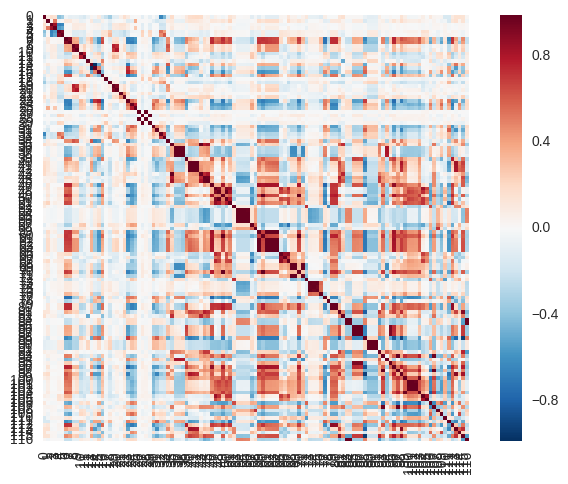

In [26]:
corrMat = trainData[::].corr();
sns.heatmap(corrMat, vmax=0.8, square = True);
trainData.shape

Feature reduction is definitely needed. 117 features is way too much for this project. Absolutely nothing is gained at this point from the heatmap. Perhaps we can loop through and find the variables with the highest R^2 values.

In [13]:
labels = trainLabel[0].value_counts();
print("Number of zeros:", labels[0]); 
print("Number of ones: ", labels[1]);

Number of zeros: 50747
Number of ones:  400


Clearly, the number of 0s are a lot greater than the number of 1s. Perhaps, we could undersample the zeros so that it is equal to the number of ones. However, that would introduce data loss. Another way that we can possibly go through this is to take 400 samples of the zero class, run the classifier (whichever one becomes optimal for one), get the parameters resulting from that classifier and repeat for the rest of the 0s with the same ones. We could average the classifiers' parameters and use that as a classifier as opposed to just using one. Doing so would decrease the loss of data. Although we would be using the same data for the 1s, the average of the parameters should converge to single values. 